In [1]:
%pylab inline
import webbpsf

Populating the interactive namespace from numpy and matplotlib


# Visualizing the JWST Optical Budget

WebbPSF 1.0 adds a tool to display different components of the optical models used in the PSF calculations. This is based on the formal optical budgets used to track JWST requirements and predicted performance. 

The total WFE is broken down into three major components: 

1. _OTE Static_ wavefront error (non-time-dependent terms).
2. _OTE Dynamic_ wavefront error (time-variable terms such as drifts)
3. _ISIM and SI_ wavefront error from each instrument. 

For each of those major components, a further division into three subcomponents is shown. Some terms are quite small (by budget and design), and negligible compared to the larger terms. 

This is invoked by the `vizualize_wfe_budget()` method: 

generating optical models
inferring OTE static WFE terms
 decomposing WFE into controllable and uncontrollable spatial frequencies
 modeling controllable and uncontrollable spatial frequencies
inferring OTE dynamic WFE terms
los jitter 0.006 arcsec, as wfe 67.02470144874732 nm
inferring ISIM + SI WFE terms
displaying plots


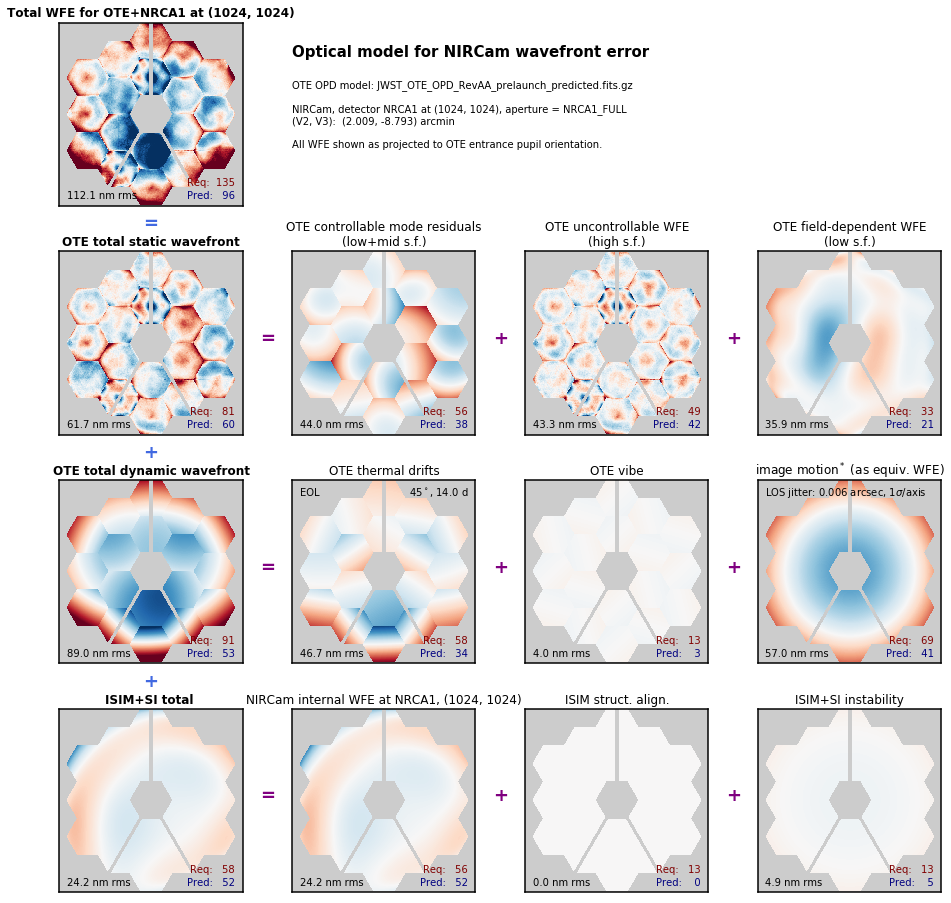

In [2]:
nrc = webbpsf.NIRCam()
nrc.visualize_wfe_budget()

The way to read the above plot is that the total system WFE (at top) is the sum of the 3 OPDs shown in the first column below.  And then in each row, the total in the left panel is the sum of the three panels to the right. 

Note that in each panel, an annotation at lower left states the RMS WFE for that term. In lower right, two annotations state the maximum amount of that term allowed set by JWST's Requirements ("Req:"), and the amount predicted by the optical budget ("Pred."). The way WebbPSF models some of these terms is distinct from the optical budget (which is fundamentally a statistical model), so exact consistency is not expected in all cases. 


** For more details on the JWST Optical Budgets:** See <a href="https://ui.adsabs.harvard.edu/abs/2018SPIE10698E..04L/abstract">Lightsey et al. 2018</a> and <a href="https://ui.adsabs.harvard.edu/abs/2014SPIE.9143E..04L/abstract">Lightsey et al. 2014</a>, or JWST project document JWST-REF-041994 ("Guide to the JWST Optical Budget", P. Lightsey).

The SI internal WFE will vary based on the selected field point. Here we select a different point in NIRCam; note the changes in the lowest row showing the NIRCam WFE.

generating optical models
inferring OTE static WFE terms
 decomposing WFE into controllable and uncontrollable spatial frequencies
 modeling controllable and uncontrollable spatial frequencies
inferring OTE dynamic WFE terms
los jitter 0.006 arcsec, as wfe 67.02470144874732 nm
inferring ISIM + SI WFE terms
displaying plots


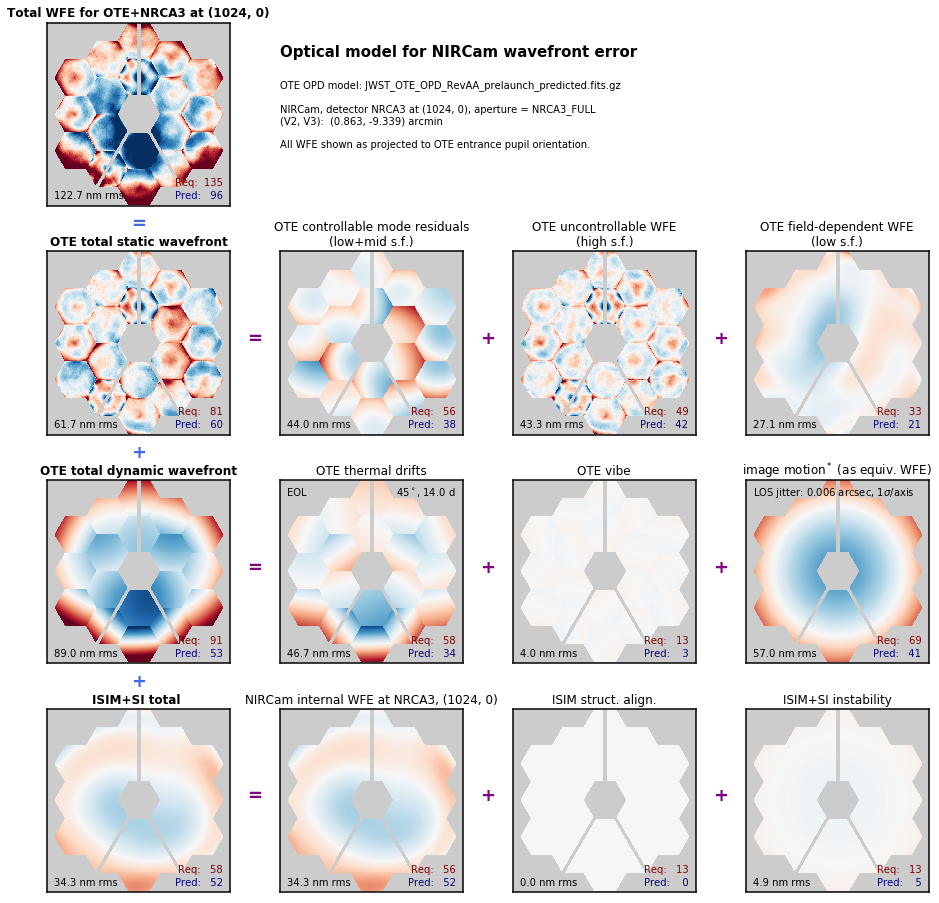

In [3]:
nrc.detector = 'NRCA3'
nrc.detector_position = (1024, 0)

nrc.visualize_wfe_budget()

In these plots, image motion (line of sight jitter) is _depicted_ as a defocus Zernike term, with magnitude calculated to yield a comparable blurring of the PSF. This is _NOT_ a physically correct representation of how line of sight jitter works optically, but it is a useful shorthand to treat jitter in comparable units as the rest of the optical budget. This is consistent with how LOS jitter is treated in the JWST budgets. 

We expect that as we gain experience in flight, the model terms will be updated to reflect achieved performance of the observatory and its systems. 

For the time being, the `prelaunch_predicted` OPD contains 10 statistical realizations of slightly different residual phasing errors in the primary mirror. 

Here we show a few examples of those different realisations, used with NIRCam, MIRI, and NIRISS respectively.

generating optical models
inferring OTE static WFE terms
 decomposing WFE into controllable and uncontrollable spatial frequencies
 modeling controllable and uncontrollable spatial frequencies
inferring OTE dynamic WFE terms
los jitter 0.006 arcsec, as wfe 67.02470144874732 nm
inferring ISIM + SI WFE terms
displaying plots


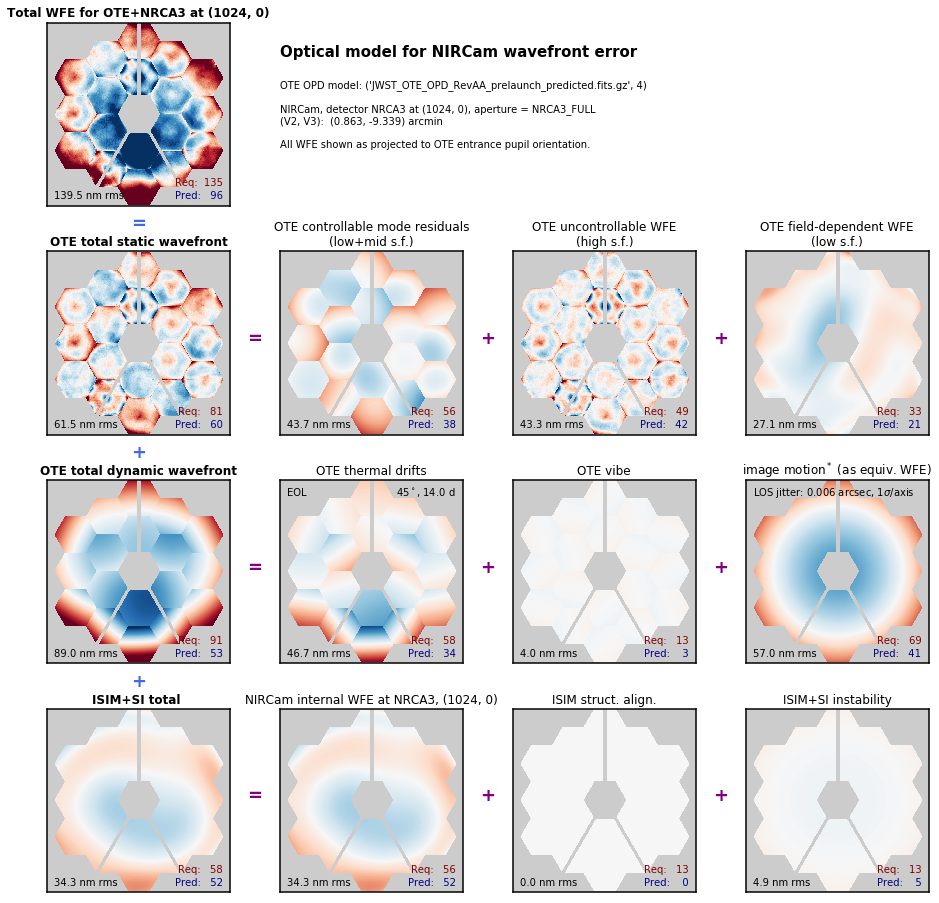

In [4]:
nrc.pupilopd = ('JWST_OTE_OPD_RevAA_prelaunch_predicted.fits.gz',4)
nrc.visualize_wfe_budget()

generating optical models
inferring OTE static WFE terms
 decomposing WFE into controllable and uncontrollable spatial frequencies
 modeling controllable and uncontrollable spatial frequencies
inferring OTE dynamic WFE terms
los jitter 0.006 arcsec, as wfe 67.67686259018029 nm
inferring ISIM + SI WFE terms
displaying plots


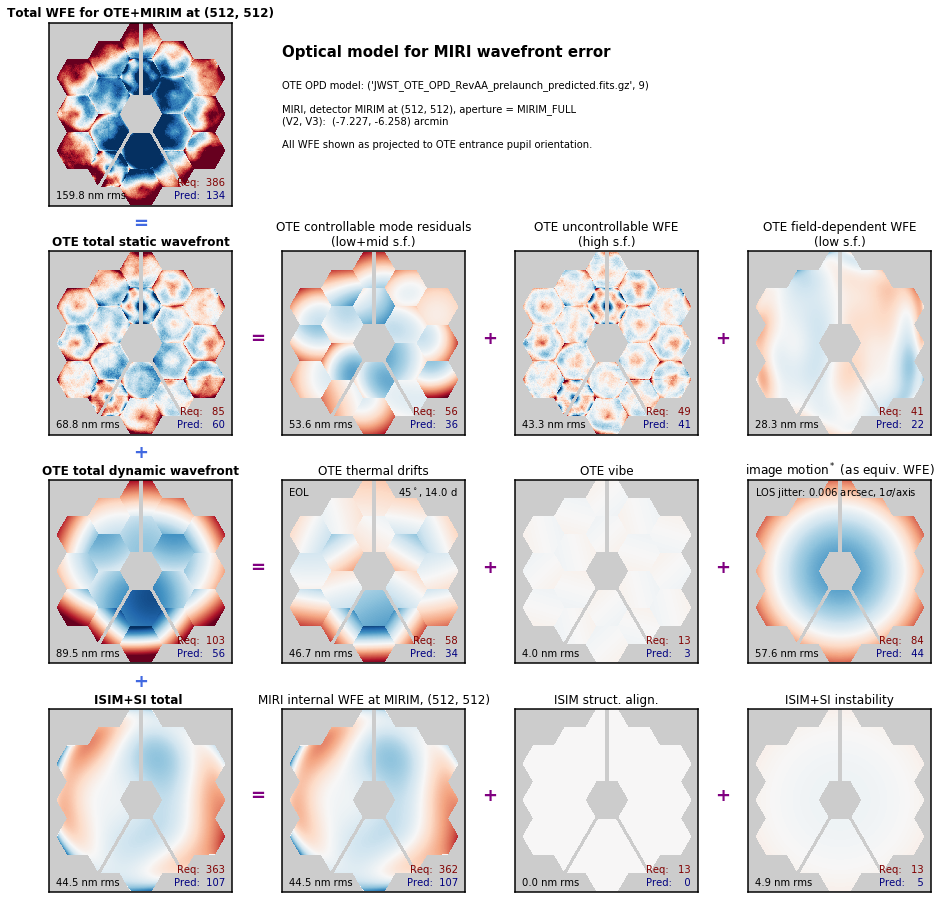

In [5]:
miri = webbpsf.MIRI()
miri.pupilopd = ('JWST_OTE_OPD_RevAA_prelaunch_predicted.fits.gz',9)
miri.visualize_wfe_budget()

For the dynamical stability of the observatory, there are predictions for both "End of Life" ("EOL", with conservative numbers for materials properties and structures after space weathering) and best current predicted performance at "Beginning of Life" ("BOL"). The thermal drifts are about 3x lower for BOL.

generating optical models
inferring OTE static WFE terms
 decomposing WFE into controllable and uncontrollable spatial frequencies
 modeling controllable and uncontrollable spatial frequencies
inferring OTE dynamic WFE terms
los jitter 0.006 arcsec, as wfe 67.2500126628957 nm
inferring ISIM + SI WFE terms
displaying plots


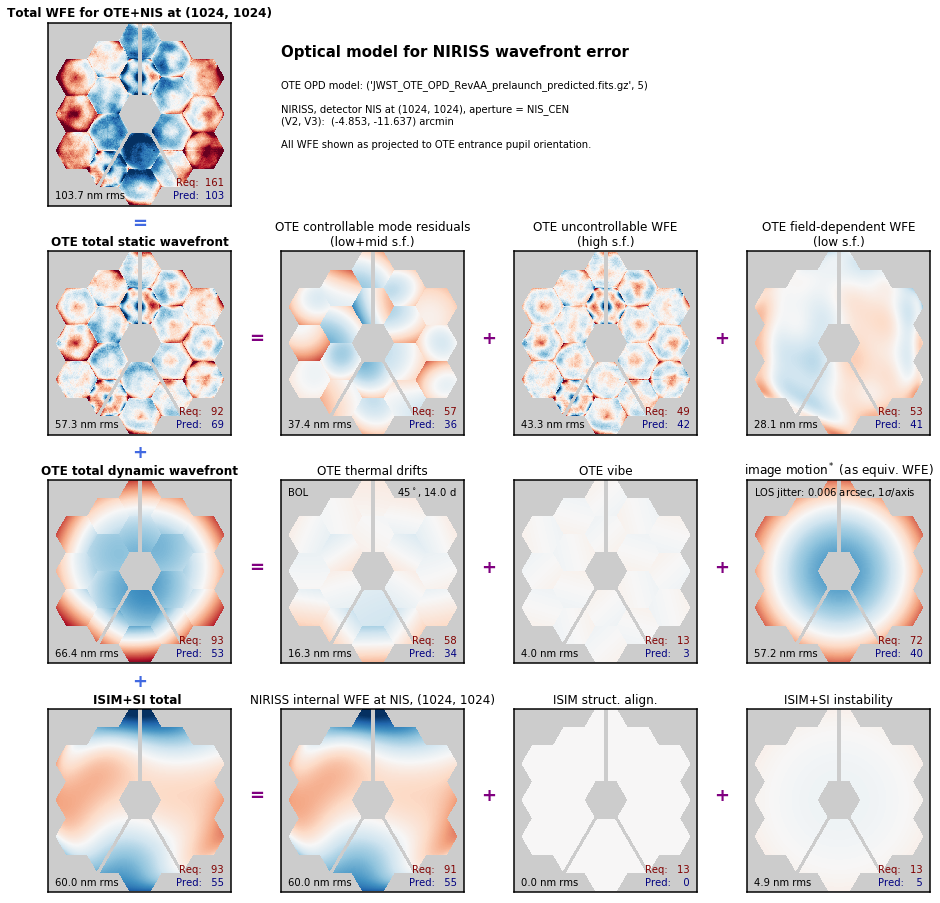

In [6]:
nis = webbpsf.NIRISS()
nis.pupilopd = ('JWST_OTE_OPD_RevAA_prelaunch_predicted.fits.gz',5)
nis.visualize_wfe_budget(slew_case='BOL')